# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [189]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [192]:
### Your code here
# Loading the data
df_bike = pd.read_csv("SeoulBikeData.csv")
# Summarising the data
df_bike.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


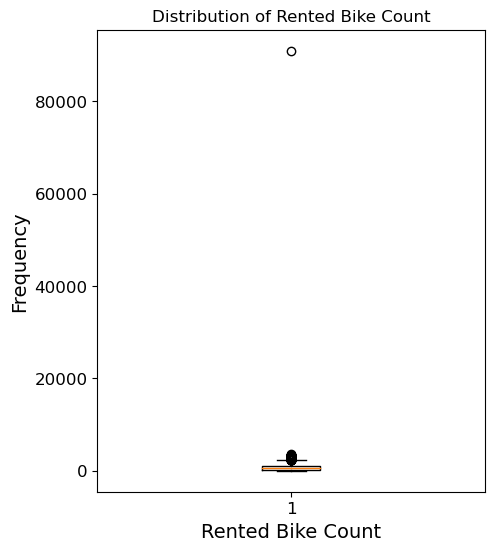

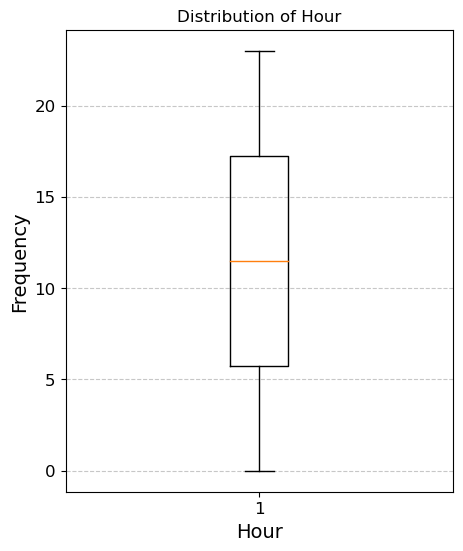

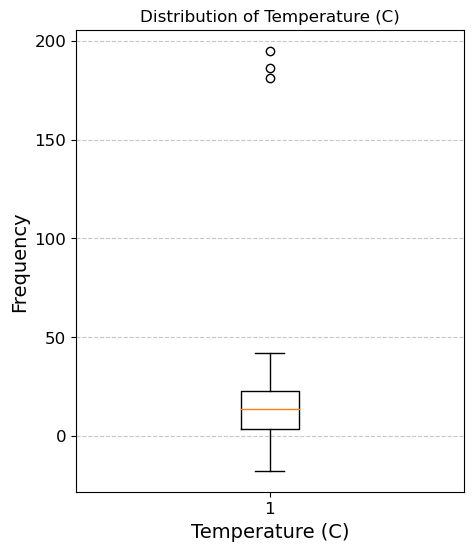

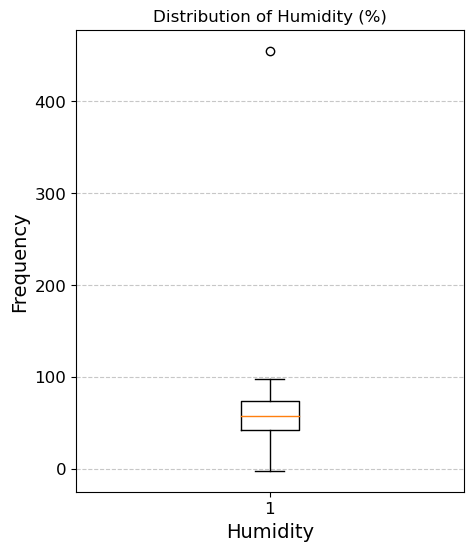

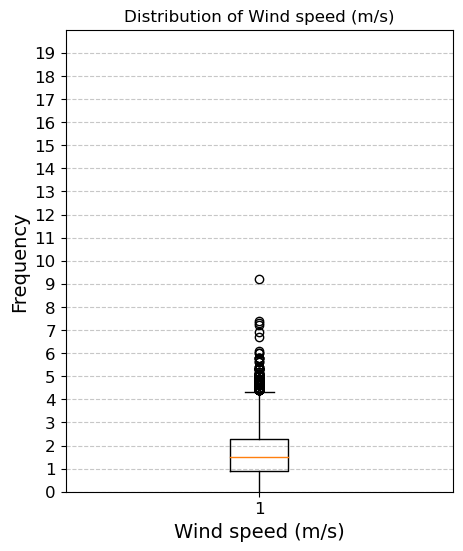

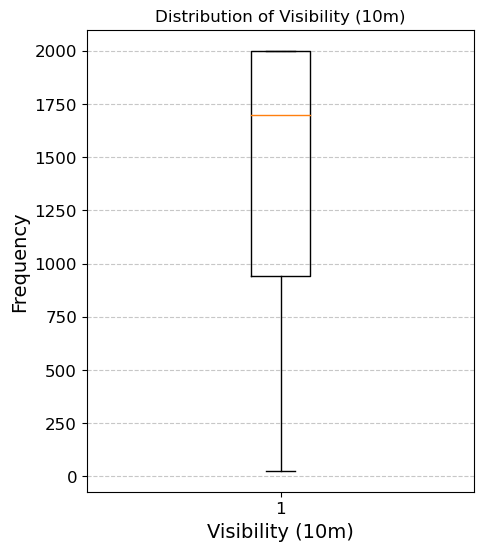

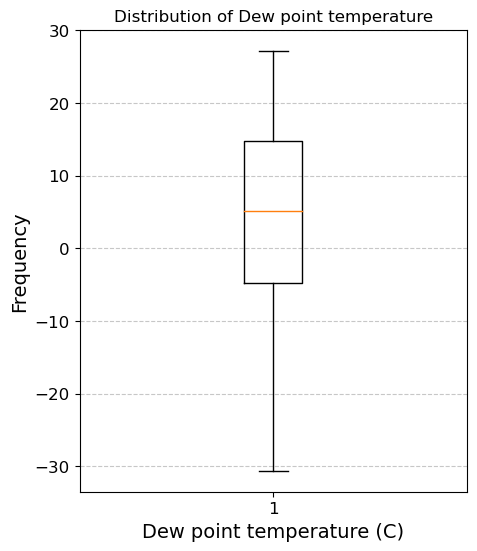

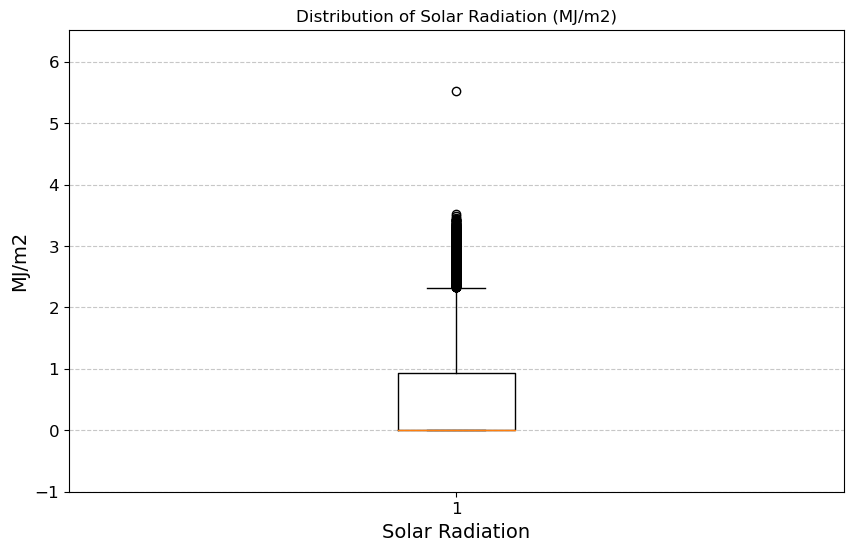

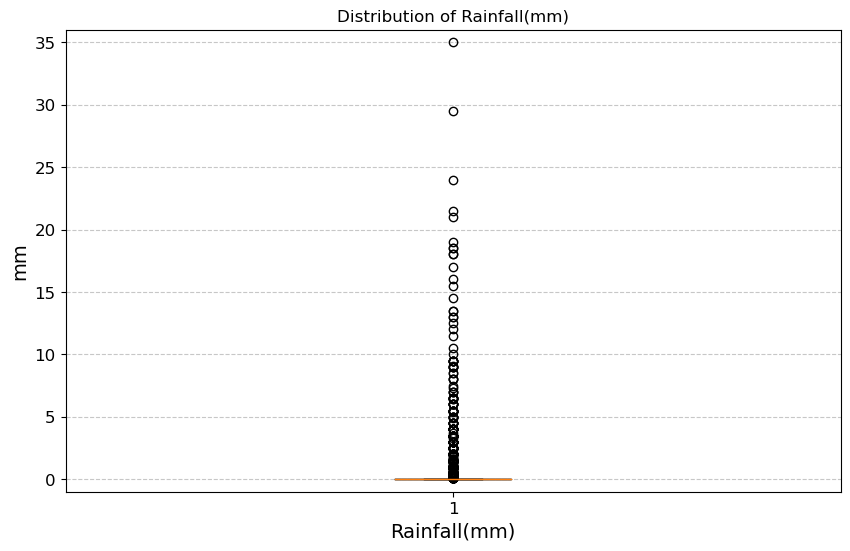

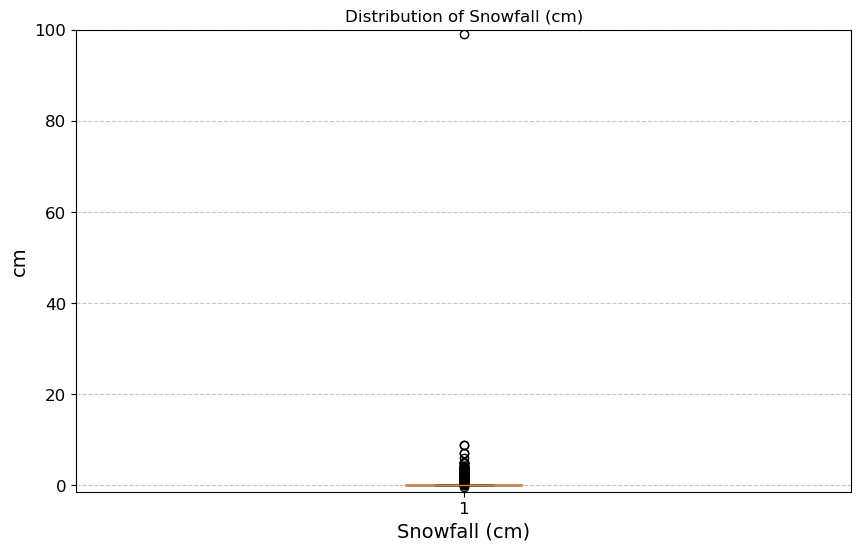

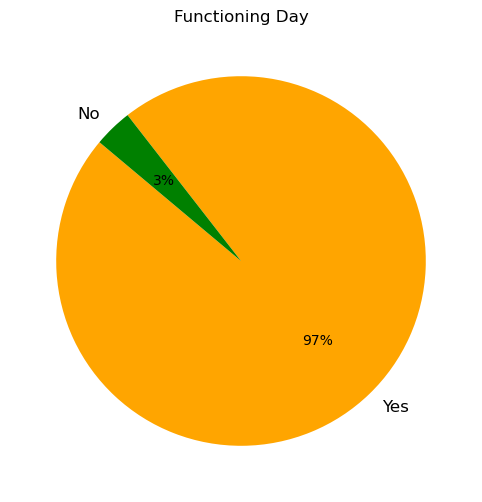

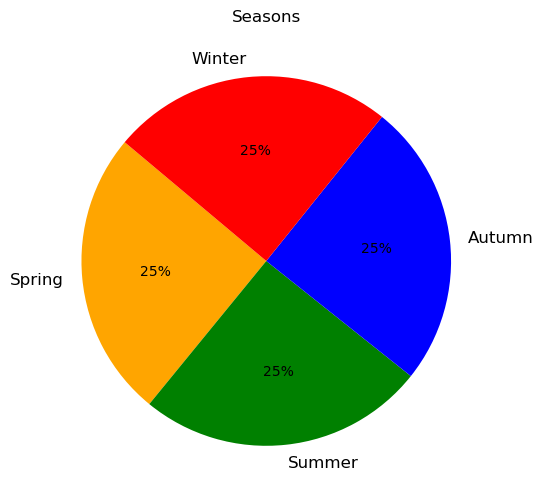

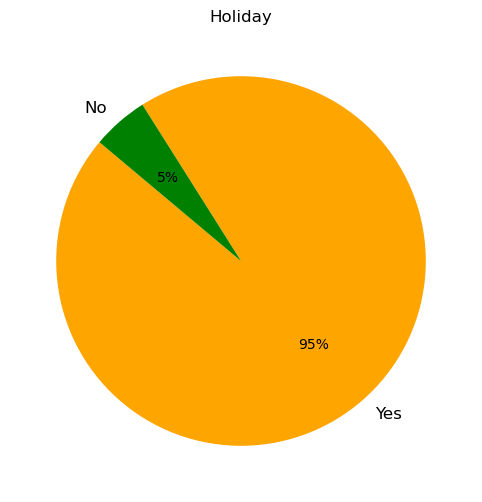

In [194]:
#Rented bike count
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.)
plt.show()

#Hour
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Hour'])
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Temperature
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Temperature (C)'])
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Humidity
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Humidity (%)'])
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Wind speed (m/s)
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Wind speed (m/s)'])
plt.ylim(0, 20)  # 
plt.yticks(range(0, 20, 1))
plt.title('Distribution of Wind speed (m/s)')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Visibility (10m)
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Visibility (10m)'])
plt.title('Distribution of Visibility (10m)')
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Dew point temperature (C)
plt.figure(figsize=(5, 6))
plt.boxplot(df_bike['Dew point temperature (C)'])
plt.title('Distribution of Dew point temperature')
plt.xlabel('Dew point temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Solar Radiation (MJ/m2)
solar_radiation = []
solar_radiation = pd.to_numeric(df_bike['Solar Radiation (MJ/m2)'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.boxplot(solar_radiation.dropna()) 
plt.title('Distribution of Solar Radiation (MJ/m2)')
plt.xlabel('Solar Radiation')
plt.ylabel('MJ/m2')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(solar_radiation.min() - 1, solar_radiation.max() + 1)
plt.show()

# Rainfall(mm)
rainfall = []
rainfall = pd.to_numeric(df_bike['Rainfall(mm)'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.boxplot(rainfall.dropna()) 
plt.title('Distribution of Rainfall(mm)')
plt.xlabel('Rainfall(mm)')
plt.ylabel('mm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(rainfall.min() - 1, rainfall.max() + 1)
plt.show()

# Snowfall (cm)
snowfall = []
snowfall = pd.to_numeric(df_bike['Snowfall (cm)'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.boxplot(snowfall.dropna()) 
plt.title('Distribution of Snowfall (cm)')
plt.xlabel('Snowfall (cm)')
plt.ylabel('cm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(snowfall.min() - 1, snowfall.max() + 1)
plt.show()

#Functioning Day
functioning_day_counts = df_bike['Functioning Day'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(functioning_day_counts, labels=functioning_day_counts.index, autopct='%.0f%%', startangle=140, colors=['orange', 'green'])
plt.title('Functioning Day')
plt.show()

#Seasons
seasons_counts = df_bike['Seasons'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(seasons_counts, labels=seasons_counts.index, autopct='%.0f%%', startangle=140, colors=['orange', 'green', 'blue', 'red'])
plt.title('Seasons')
plt.show()

#Holiday
holiday_counts = df_bike['Holiday'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(holiday_counts, labels=functioning_day_counts.index, autopct='%.0f%%', startangle=140, colors=['orange', 'green'])
plt.title('Holiday')
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [197]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [199]:
### Your code here (and remember to upload the resulting csv)

#updating and deleting Functioning Day column
df_bike = df_bike[df_bike['Functioning Day'] != 'No']
df_bike=df_bike.drop(columns=['Functioning Day'])

df_bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday


In [201]:
df_bike['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [203]:
#Converting seasons to a one hot encoded format
df_bike = pd.concat([df_bike, pd.get_dummies(df_bike['Seasons'], prefix='Season').astype(int)], axis=1)
df_bike = df_bike.drop(columns=['Seasons'])
df_bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,No Holiday,1,0,0,0
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,No Holiday,1,0,0,0
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,No Holiday,1,0,0,0
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,No Holiday,1,0,0,0


In [205]:
#Replacing the Date feature with a binary Weekday feature
df_bike['Date'] = df_bike['Date'].apply(date_is_weekday)
df_bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,No Holiday,1,0,0,0
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,No Holiday,1,0,0,0
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,No Holiday,1,0,0,0
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,No Holiday,1,0,0,0


In [207]:
#Convert Holiday column (to make it numeric as it is object type)

df_bike['Holiday'] = df_bike['Holiday'].replace({ 'No Holiday': 1, 'Holiday':0})
df_bike

/var/folders/65/mg4b8g7j69v952fp0lz4_y_w0000gn/T/ipykernel_29763/357622095.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bike['Holiday'] = df_bike['Holiday'].replace({ 'No Holiday': 1, 'Holiday':0})


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,1,0,0,0,1
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,1,0,0,0,1
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,1,0,0,0,1
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,1,0,0,0,1
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,1,1,0,0,0
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,1,1,0,0,0
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,1,1,0,0,0
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,1,1,0,0,0


In [209]:
#convert non-numerical columns to numerical
df_bike= df_bike.apply(pd.to_numeric, errors="coerce")
print(df_bike.dtypes)

Date                           int64
Rented Bike Count              int64
Hour                           int64
Temperature (C)              float64
Humidity (%)                 float64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature (C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        int64
Season_Autumn                  int64
Season_Spring                  int64
Season_Summer                  int64
Season_Winter                  int64
dtype: object


In [211]:
#Fixing outliers and errors in the data

df_bike=df_bike[df_bike['Rented Bike Count'] <= 5000]
df_bike=df_bike[df_bike['Temperature (C)'] <= 50]
df_bike=df_bike[df_bike['Humidity (%)'] <= 100]
df_bike=df_bike[df_bike['Wind speed (m/s)'] <= 10]


df_bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,1
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,1,1,0,0,0
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,1,1,0,0,0
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,1,1,0,0,0
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,1,1,0,0,0


In [213]:
#saving the updated data
df_bike.to_csv('CleanedSeoulBikeData.csv')

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy = "median")),
    ('std_scaler',StandardScaler())
])

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [220]:
### Your code and outputs here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Splitting the data
x = df_bike.drop(columns=['Rented Bike Count'])
y = df_bike['Rented Bike Count'] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1904482)

In [222]:
#Fitting linear regression using pipeline

linear_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy = "median")),
    ('std_scaler',StandardScaler()),
    ("linreg", LinearRegression())
])
linear_pipeline.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('linreg', LinearRegression())])

In [224]:
#calculating RMSE

train_pred = linear_pipeline.predict(x_train)
test_pred = linear_pipeline.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(train_pred,y_train)) #train rmse
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(test_pred,y_test)) #test rmse
print(rmse_test)

433.93152528752944
441.398717734535


In [226]:
# baseline
mean_train = np.mean(y_train)
mean_pred = [mean_train] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, mean_pred))
print(baseline_rmse)

629.2669346004279


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [229]:
### Your ChatGPT prompt
#1 how to perform 10 fold cross validation on svr model
"""model = SVR()
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE scores for each fold:", -scores)"""

#fixed code -              
#since we have defined the svr_pipeline
"""SVR_scores = cross_val_score(SVR_pipeline, x_train, y_train, cv=10, scoring=scorer)"""
#outputs:

#2 Perform optimization in SVR
"""pipeline = make_pipeline(StandardScaler(), SVR())
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2],
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X, y)"""

#fixed code - 
"""SVR_param_grid = {
    "svrreg__C": [0.1, 1, 10],
    "svrreg__gamma": ["scale", "auto"],
    "svrreg__kernel": ["linear", "rbf"]
}

SVR_Grid = GridSearchCV(SVR_pipeline, SVR_param_grid, cv=10, scoring=scorer, n_jobs=-1)
SVR_Grid.fit(x_train, y_train)"""
#outputs:

'SVR_param_grid = {\n    "svrreg__C": [0.1, 1, 10],\n    "svrreg__gamma": ["scale", "auto"],\n    "svrreg__kernel": ["linear", "rbf"]\n}\n\nSVR_Grid = GridSearchCV(SVR_pipeline, SVR_param_grid, cv=10, scoring=scorer, n_jobs=-1)\nSVR_Grid.fit(x_train, y_train)'

In [231]:
### Code here (with outputs)

from sklearn.metrics import make_scorer,mean_squared_error,root_mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold 

#10 fold cross validation

lr_pipeline = Pipeline([
        ("preprocessor", pipeline),	
        ("linreg", LinearRegression())
])
svr_pipeline = Pipeline([
        ("preprocessor", pipeline),	
        ("svrreg", SVR())
])

rmse_score = make_scorer(root_mean_squared_error)
linearReg_scores = cross_val_score(lr_pipeline, x_train, y_train, cv=10, scoring=rmse_score)
svr_scores = cross_val_score(svr_pipeline, x_train, y_train, cv=10, scoring=rmse_score)

#RMSE values for each model
print("RMSE for Linear Regression:")
print(f"RMSE Linear Regression Mean = {np.mean(linearReg_scores)}")
print(f"RMSE Linear Regression Standard Deviation= {np.std(linearReg_scores)}")
print("RMSE for Support Vector Regressor:")
print(f"SVR Mean = {np.mean(svr_scores)}")
print(f"SVR Standard Deviation = {np.std(svr_scores)}")

RMSE for Linear Regression:
RMSE Linear Regression Mean = 434.5020250421477
RMSE Linear Regression Standard Deviation= 20.96802902543267
RMSE for Support Vector Regressor:
SVR Mean = 539.4627683533312
SVR Standard Deviation = 23.62889360976168


In [232]:
#hyper-parameter optimisation using GridSearch

lr_param_grid = {
	"linreg__fit_intercept": [True, False]
}

svr_param_grid = {
    "svrreg__C": [100,1000],
    "svrreg__gamma": ["scale", "auto"],
    "svrreg__kernel": [ "rbf", "poly"],
    "svrreg__degree": [1,4]
}

lr_Grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=10, scoring=rmse_score, n_jobs=-1)
lr_Grid.fit(x_train, y_train)
lr_best_rmse = root_mean_squared_error(y_train, lr_Grid.predict(x_train))
svr_Grid = GridSearchCV(svr_pipeline, svr_param_grid, cv=10, scoring=rmse_score, n_jobs=-1)
svr_Grid.fit(x_train, y_train)
svr_best_rmse = root_mean_squared_error(y_train,svr_Grid.predict(x_train))


In [233]:
#mean and standard deviation of the RMSE values for optimized model 

print(f"LR RMSE: {lr_best_rmse}")
print(f"LR RMSE:Mean = {np.mean(lr_best_rmse)}")
print(f"LR RMSE:Std Dev = {np.std(lr_best_rmse)}")
print(f"SVR RMSE:= {svr_best_rmse}")
print(f"SVR RMSE:Mean = {np.mean(svr_best_rmse)}")
print(f"SVR RMSE:Std Dev = {np.std(svr_best_rmse)}")

LR RMSE: 851.940944839558
LR RMSE:Mean = 851.940944839558
LR RMSE:Std Dev = 0.0
SVR RMSE:= 448.8762409628304
SVR RMSE:Mean = 448.8762409628304
SVR RMSE:Std Dev = 0.0


In [237]:
svrprediction = svr_Grid.predict(x_test)
root_mean_squared_error(y_test, svrprediction)

447.4135316322663

In [239]:
lrprediction = lr_Grid.predict(x_test)
root_mean_squared_error(y_test, lrprediction)

836.9298031698268

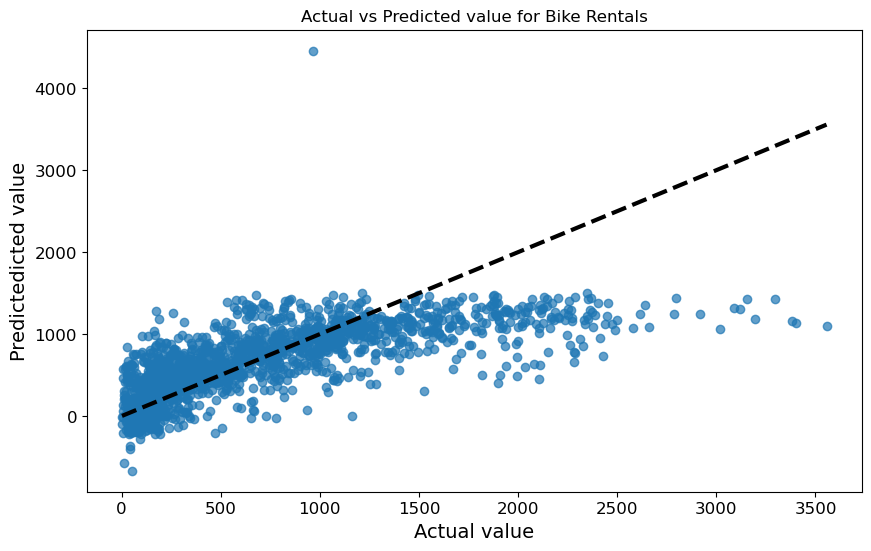

In [241]:
#Since svr has smallest root mean squarred error, it is the best model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, svrprediction, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual value')
plt.ylabel('Predictedicted value')
plt.title('Actual vs Predicted value for Bike Rentals')
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [5]:
### Your answer here (maximum of 200 words)

And in the LR param grid for grid search, the linear regression model doesn't have hyper parameters so we
could have avoided the step to check the best param for Linear Regression using grid search where we have
given the intercept parameters in place of hyper parameters and did the grid search.
It is a redundant step which does not carry much significance as in complex models like svr.